# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    weather_response = requests.get(city_url)
    weather_json = weather_response.json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = weather_json['weather'][0]['description']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | st. john's
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | kununurra
Processing Record 7 of Set 1 | natal
Processing Record 8 of Set 1 | susuman
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | selfoss
Processing Record 11 of Set 1 | cidreira
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 15 of Set 1 | popondetta
Processing Record 16 of Set 1 | severo-yeniseyskiy
Processing Record 17 of Set 1 | nassau
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | iskateley
Processing Record 21 of Set 1 | west island
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,25.71,79,37,4.24,PN,1711325406
1,grytviken,-54.2811,-36.5092,-1.39,79,39,5.43,GS,1711325151
2,st. john's,47.5649,-52.7093,9.53,93,100,2.24,CA,1711325242
3,ushuaia,-54.8000,-68.3000,7.05,95,97,0.77,AR,1711325337
4,bethel,41.3712,-73.4140,4.75,53,0,3.09,US,1711325409


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.71,79,37,4.24,PN,1711325406
1,grytviken,-54.2811,-36.5092,-1.39,79,39,5.43,GS,1711325151
2,st. john's,47.5649,-52.7093,9.53,93,100,2.24,CA,1711325242
3,ushuaia,-54.8000,-68.3000,7.05,95,97,0.77,AR,1711325337
4,bethel,41.3712,-73.4140,4.75,53,0,3.09,US,1711325409


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

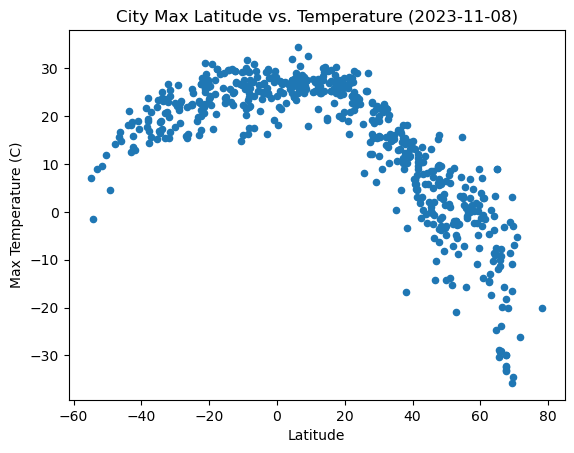

In [12]:
# Build scatter plot for latitude vs. temperature
title = 'City Max Latitude vs. Temperature (2023-11-08)'
xlabel = 'Latitude'
ylabel = 'Max Temperature (C)'


# Incorporate the other graph properties
city_data_df.plot.scatter(x = 'Lat', y = 'Max Temp', title = title, xlabel = xlabel, ylabel = ylabel)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

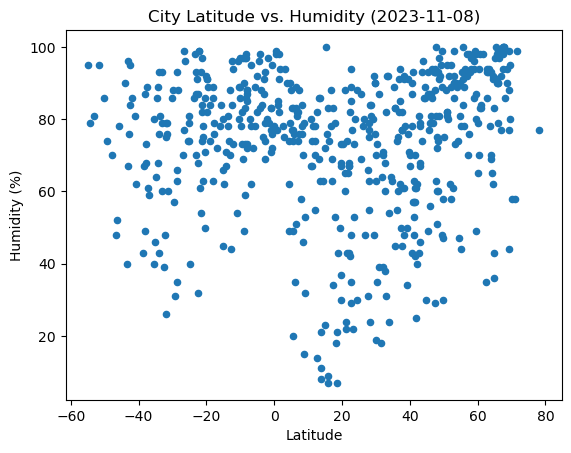

In [13]:
# Build the scatter plots for latitude vs. humidity
title = 'City Latitude vs. Humidity (2023-11-08)'
xlabel = 'Latitude'
ylabel = 'Humidity (%)'


# Incorporate the other graph properties
city_data_df.plot.scatter(x = 'Lat', y = 'Humidity', title = title, xlabel = xlabel, ylabel = ylabel)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

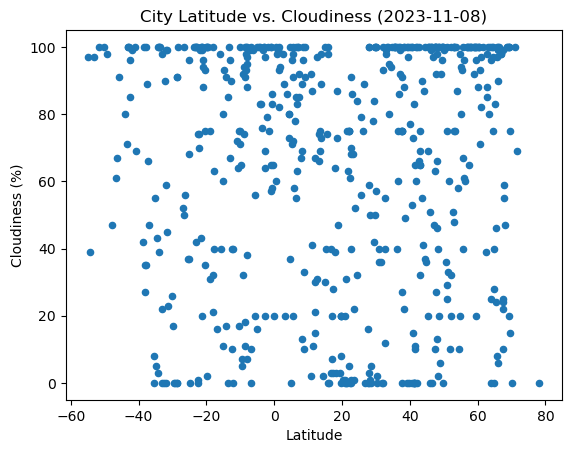

In [14]:
# Build the scatter plots for latitude vs. cloudiness
title = 'City Latitude vs. Cloudiness (2023-11-08)'
xlabel = 'Latitude'
ylabel = 'Cloudiness (%)'


# Incorporate the other graph properties
city_data_df.plot.scatter(x = 'Lat', y = 'Cloudiness', title = title, xlabel = xlabel, ylabel = ylabel)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

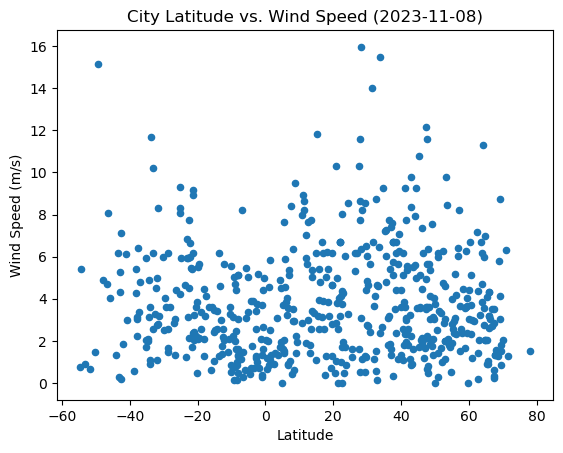

In [15]:
# Build the scatter plots for latitude vs. wind speed
title = 'City Latitude vs. Wind Speed (2023-11-08)'
xlabel = 'Latitude'
ylabel = 'Wind Speed (m/s)'


# Incorporate the other graph properties
city_data_df.plot.scatter(x = 'Lat', y = 'Wind Speed', title = title, xlabel = xlabel, ylabel = ylabel)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.71,79,37,4.24,PN,1711325406
1,grytviken,-54.2811,-36.5092,-1.39,79,39,5.43,GS,1711325151
2,st. john's,47.5649,-52.7093,9.53,93,100,2.24,CA,1711325242
3,ushuaia,-54.8000,-68.3000,7.05,95,97,0.77,AR,1711325337
4,bethel,41.3712,-73.4140,4.75,53,0,3.09,US,1711325409


In [17]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
import scipy.stats as st

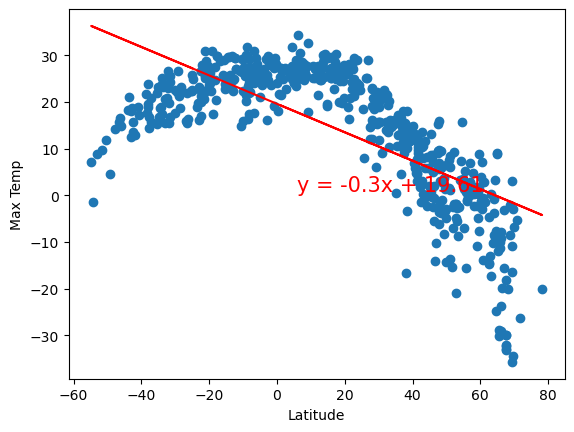

In [18]:
lat = city_data_df['Lat']
temp = city_data_df['Max Temp']

x_values = lat
y_values = temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

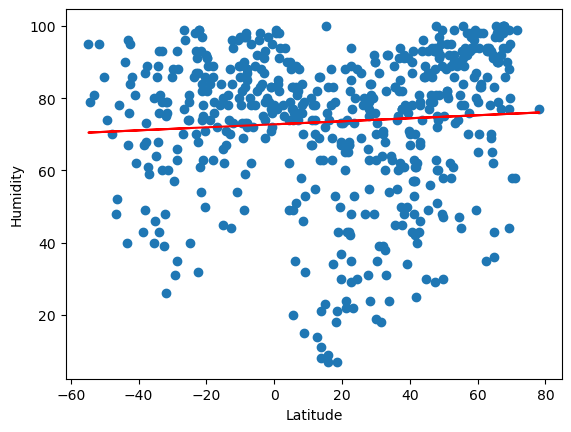

In [19]:
#City Latitude vs. Humidity
lat = city_data_df['Lat']
humidity = city_data_df['Humidity']

x_values = lat
y_values = humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

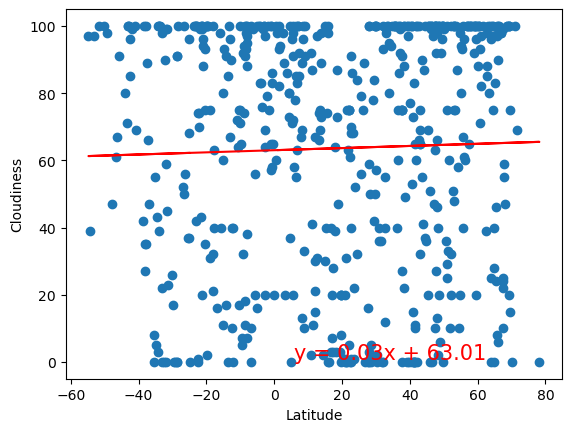

In [20]:
lat = city_data_df['Lat']
cloud = city_data_df['Cloudiness']

x_values = lat
y_values = cloud

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

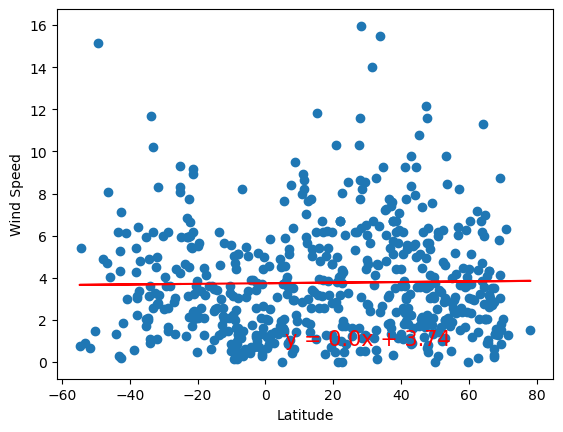

In [21]:
#City Latitude vs. wind speed
lat = city_data_df['Lat']
wind = city_data_df['Wind Speed']

x_values = lat
y_values = wind

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,st. john's,47.5649,-52.7093,9.53,93,100,2.24,CA,1711325242
4,bethel,41.3712,-73.4140,4.75,53,0,3.09,US,1711325409
7,susuman,62.7833,148.1667,-13.01,93,98,1.43,RU,1711325410
9,selfoss,63.9331,-20.9971,-3.86,70,25,4.70,IS,1711325410
13,severo-yeniseyskiy,60.3725,93.0408,-3.01,94,100,6.71,RU,1711325412


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,25.71,79,37,4.24,PN,1711325406
1,grytviken,-54.2811,-36.5092,-1.39,79,39,5.43,GS,1711325151
3,ushuaia,-54.8000,-68.3000,7.05,95,97,0.77,AR,1711325337
5,kununurra,-15.7667,128.7333,28.99,84,40,3.60,AU,1711325127
6,natal,-5.7950,-35.2094,28.12,78,20,3.09,BR,1711324687


###  Temperature vs. Latitude Linear Regression Plot

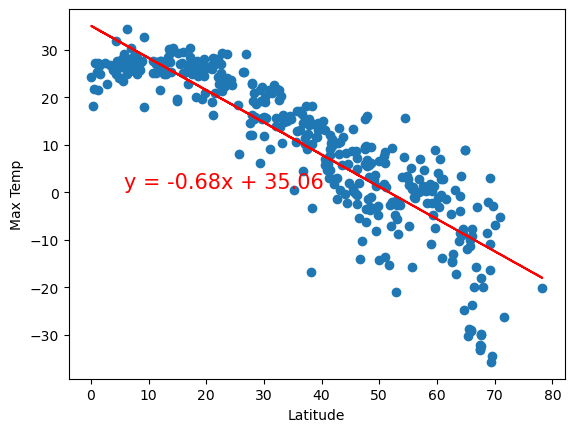

In [24]:
# Linear regression on Northern Hemisphere
lat = northern_hemi_df['Lat']
temp = northern_hemi_df['Max Temp']

x_values = lat
y_values = temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

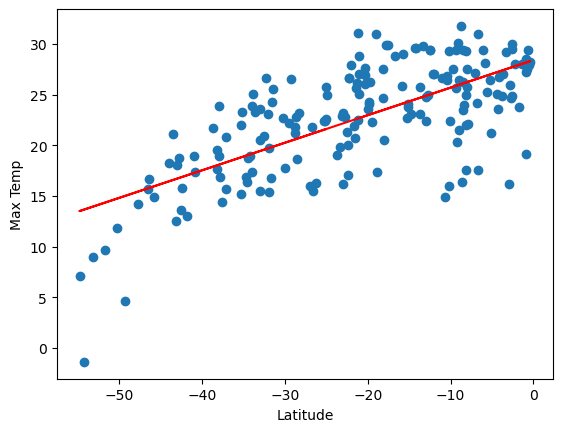

In [25]:
# Linear regression on Southern Hemisphere
lat = southern_hemi_df['Lat']
temp = southern_hemi_df['Max Temp']

x_values = lat
y_values = temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

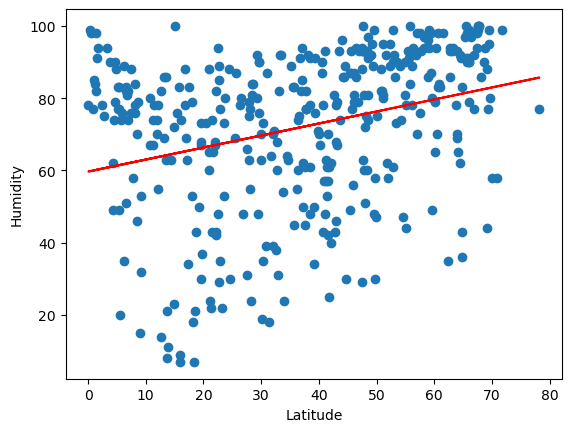

The R values is 0.3035274884512708


In [26]:
# Northern Hemisphere
lat = northern_hemi_df['Lat']
humidity = northern_hemi_df['Humidity']

x_values = lat
y_values = humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f'The R values is {rvalue}')

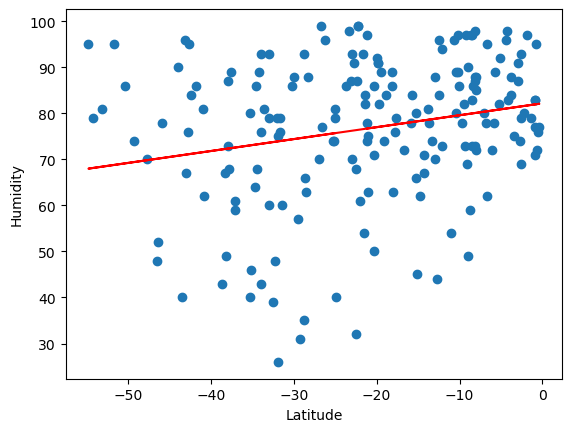

The R values is 0.22605634976674654


In [27]:
# Southern Hemisphere
lat = southern_hemi_df['Lat']
humidity = southern_hemi_df['Humidity']

x_values = lat
y_values = humidity

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f'The R values is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

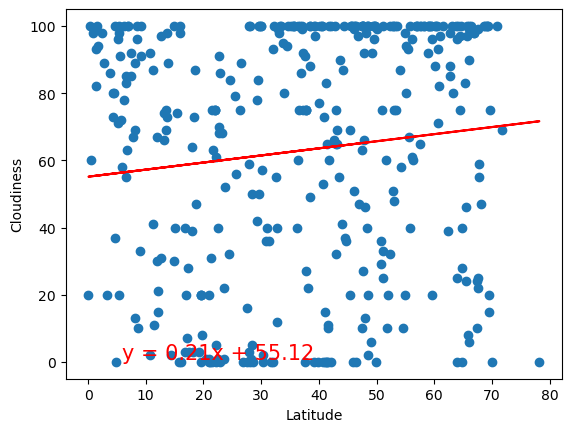

The R values is 0.11454390199041306


In [28]:
# Northern Hemisphere
lat = northern_hemi_df['Lat']
Cloudiness = northern_hemi_df['Cloudiness']

x_values = lat
y_values = Cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f'The R values is {rvalue}')

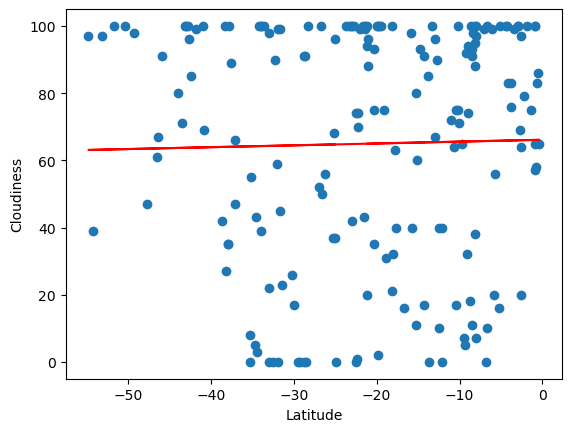

The R values is 0.021657594193158058


In [29]:
# Southern Hemisphere
lat = southern_hemi_df['Lat']
Cloudiness = southern_hemi_df['Cloudiness']

x_values = lat
y_values = Cloudiness

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f'The R values is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

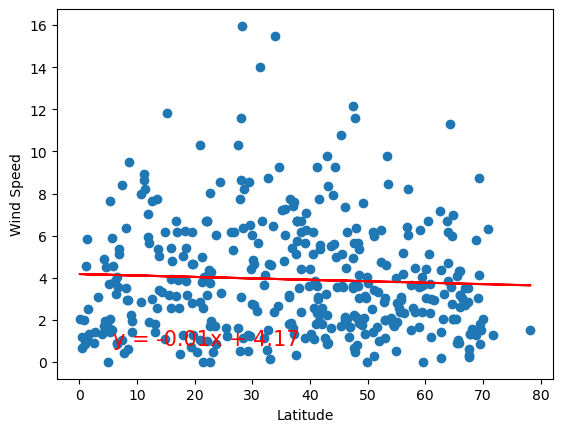

The R values is -0.049771284618435066


In [30]:
# Northern Hemisphere
lat = northern_hemi_df['Lat']
wind = northern_hemi_df['Wind Speed']

x_values = lat
y_values = wind

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f'The R values is {rvalue}')

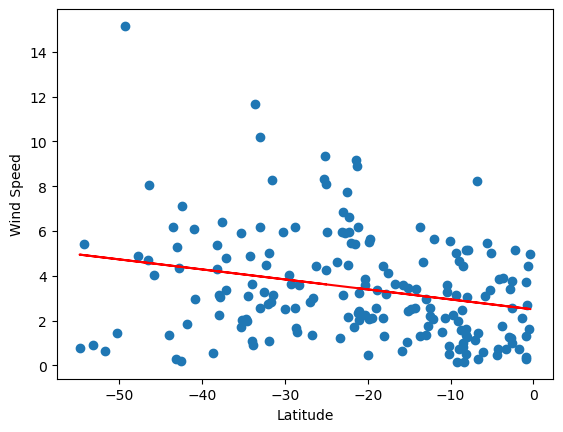

The R values is -0.2566927976438805


In [31]:
# Southern Hemisphere
lat = southern_hemi_df['Lat']
wind = southern_hemi_df['Wind Speed']

x_values = lat
y_values = wind

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f'The R values is {rvalue}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE